<a href="https://colab.research.google.com/github/vivian-xia/YOLOv4_TrafficObjectDetection/blob/main/Explore_COCO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import packages

In [ ]:
!pip install -U 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/leimao/cocoapi.git to /tmp/pip-req-build-t5a7z79_
  Running command git clone -q https://github.com/leimao/cocoapi.git /tmp/pip-req-build-t5a7z79_
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264336 sha256=97932f15c7f14482e0fd6bf952bf5fe6cfcc2003da561b3b3440fc301ae34600
  Stored in directory: /tmp/pip-ephem-wheel-cache-2sp9whwh/wheels/ae/69/62/b04044fd6c6a67df4cf915150a18dbfb0afdee4bedada04049
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
matplotlib.use('Agg')
%pylab inline

from PIL import Image
import skimage.io as io
import requests
from pycocotools.coco import COCO

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -o annotations_trainval2017.zip 

--2022-05-16 21:25:17--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.144.187
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.144.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  95.8MB/s    in 2.5s    

2022-05-16 21:25:20 (95.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


### Explore Data

Refer to [repo](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py) for pycocotools API information.

In [ ]:
coco_annotation_file_path = "annotations/instances_val2017.json"
coco = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [ ]:
# Category IDs - 81 class categories (id:0 is background) 
cat_ids = coco.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("\n")

# All categories.
cats = coco.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)
print("\n")

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
print("\n")

print("Supercategory with category names:")
print(cats)

Number of Unique Categories: 80


Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


COCO supercategories: 
indoor food furniture appliance vehicle animal outdoor access

In [ ]:
# note that ids are not consecutive
for i in cats:
  print(i)

{'supercategory': 'person', 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}
{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}
{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}
{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}
{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}
{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}
{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}
{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}
{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}
{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}
{'supercategory': 'animal', 'id': 16, 'name': 'bird'}
{'supercategory': 'animal', 'id': 17, 'name': 'cat'}
{'supercategory': 'animal', 'id': 18, 'name': 'dog'}
{'supercategory': 'animal', 'id':

In [ ]:
def getClassName(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

print('The class name is', getClassName(77, cats))

The class name is cell phone


In [ ]:
num_images = {}

# number of images for each category
for i in range(len(cat_ids)):
  query_id = cat_ids[i]
  img_ids = coco.getImgIds(catIds=[query_id])
  print(f"Number of Images Containing {query_id} - {getClassName(query_id, cats)}: {len(img_ids)}")
  
  num_images[query_id] = len(img_ids)

Number of Images Containing 1 - person: 2693
Number of Images Containing 2 - bicycle: 149
Number of Images Containing 3 - car: 535
Number of Images Containing 4 - motorcycle: 159
Number of Images Containing 5 - airplane: 97
Number of Images Containing 6 - bus: 189
Number of Images Containing 7 - train: 157
Number of Images Containing 8 - truck: 250
Number of Images Containing 9 - boat: 121
Number of Images Containing 10 - traffic light: 191
Number of Images Containing 11 - fire hydrant: 86
Number of Images Containing 13 - stop sign: 69
Number of Images Containing 14 - parking meter: 37
Number of Images Containing 15 - bench: 235
Number of Images Containing 16 - bird: 125
Number of Images Containing 17 - cat: 184
Number of Images Containing 18 - dog: 177
Number of Images Containing 19 - horse: 128
Number of Images Containing 20 - sheep: 65
Number of Images Containing 21 - cow: 87
Number of Images Containing 22 - elephant: 89
Number of Images Containing 23 - bear: 49
Number of Images Con

In [ ]:
# number of images for each supercategory
for n in nms:
  superList = []
  
  for i in range(len(cat_ids)):
    query_id = cat_ids[i]
  
    if cats[i]['supercategory'] == n:
      superList.append(num_images[query_id])

    sum_superList = sum(superList)
  print(f"{n} has {sum_superList}")

indoor has 17867
food has 20351
furniture has 40521
appliance has 11679
vehicle has 38683
animal has 25739
outdoor has 13859
accessory has 22549
kitchen has 38744
person has 64115
electronic has 19955
sports has 28934


In [ ]:
# Category ID -> Category Name.
query_id = cat_ids[3]
query_annotation = coco.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}")

Category ID -> Category Name:
Category ID: 4, Category Name: motorcycle, Supercategory: vehicle


In [ ]:
# Get the ID of all the images containing the object of the category.
img_ids = coco.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Number of Images Containing motorcycle: 159


In [ ]:
# Pick one image.
img_id = img_ids[2]
img_info = coco.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}")

Image ID: 102411, File Name: 000000102411.jpg, Image URL: http://images.cocodataset.org/val2017/000000102411.jpg


In [ ]:
# Get all the annotations for the specified image.
ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

Annotations for Image ID 102411:
[{'segmentation': [[310.89, 259.08, 367.51, 244.69, 383.82, 249.48, 384.78, 253.32, 406.85, 248.52, 406.85, 266.76, 412.61, 276.35, 416.44, 280.19, 413.57, 287.87, 410.69, 299.38, 403.97, 295.54, 405.89, 318.57, 405.89, 321.45, 391.5, 351.2, 380.94, 356.95, 355.99, 357.91, 337.76, 343.52, 332.0, 333.92, 307.06, 332.0, 268.67, 332.0, 261.96, 324.33, 283.07, 280.19, 292.66, 276.35, 306.1, 294.58, 286.91, 296.5, 285.95, 302.26, 309.93, 315.69, 333.92, 308.98, 335.84, 306.1], [296.5, 214.94, 305.14, 223.58, 302.26, 233.17, 256.2, 264.84, 232.21, 341.6, 213.02, 337.76, 196.71, 324.33, 188.07, 292.66, 198.63, 259.08, 208.22, 249.48, 214.94, 244.69, 230.29, 244.69, 237.97, 221.66, 224.53, 215.9, 221.66, 201.51, 244.69, 207.26, 259.08, 212.06, 274.43, 223.58, 287.87, 222.62, 293.62, 217.82], [285.95, 184.23, 261.0, 189.99, 245.64, 195.75, 239.89, 188.07, 240.85, 181.36, 234.13, 183.27, 232.21, 189.03, 257.16, 201.51, 275.39, 200.55, 284.99, 193.83, 290.74, 182.

In [ ]:
# Use URL to load image.
im = Image.open(requests.get(img_url, stream=True).raw)

# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)

# Plot segmentation and bounding box.
coco.showAnns(anns, draw_bbox=True)
plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)

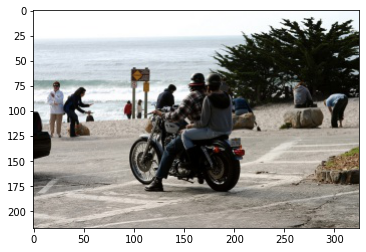

In [ ]:
img = mpimg.imread('/content/102411.jpg')
imgplot = plt.imshow(img)
plt.show()

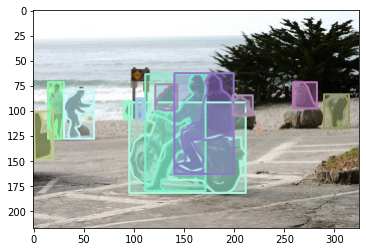

In [ ]:
img = mpimg.imread('/content/102411_annotated.jpg')
imgplot = plt.imshow(img)
plt.show()

Number of images containing all the  classes: 3


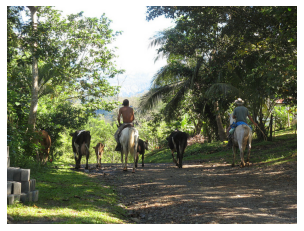

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['horse', 'cow', 'person']);
imgIds = coco.getImgIds(catIds=catIds);
print("Number of images containing all the  classes:", len(imgIds))

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

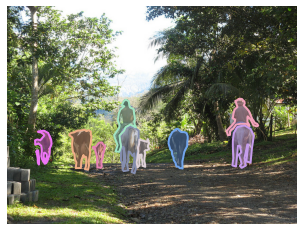

In [ ]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

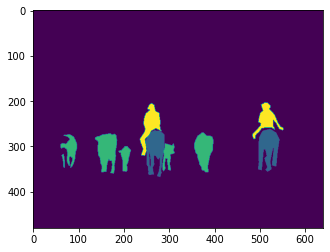

In [ ]:
#### GENERATE A SEGMENTATION MASK #### - Each pixel has a label according to the class it falls into
filterClasses = ['horse', 'cow', 'person']
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    className = getClassName(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)

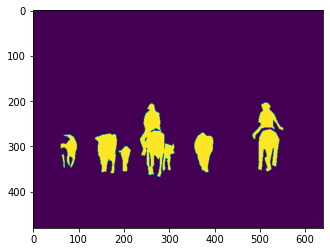

In [ ]:
#### GENERATE A BINARY MASK #### - binary masking implies that the output mask will have only 2 pixel values, i.e., 1 (object: could be any of the N classes) and 0 (the background).
mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
plt.imshow(mask)